In [39]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage import exposure

In [40]:
cap = cv2.VideoCapture('../data/piece_videos/black-bishop.MOV')

In [41]:
for _ in range(300):
    ret, img = cap.read()

# Remove Green Background

In [49]:
img

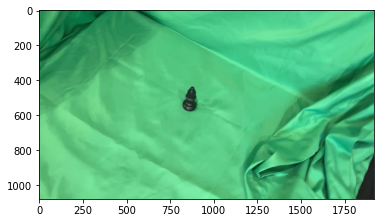

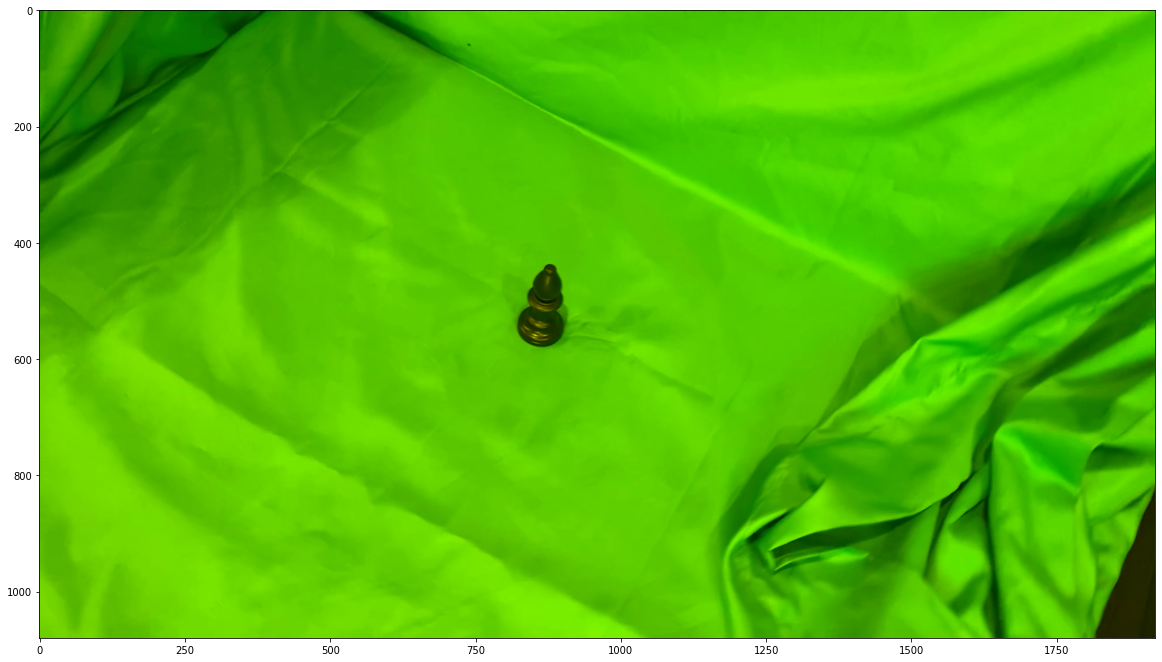

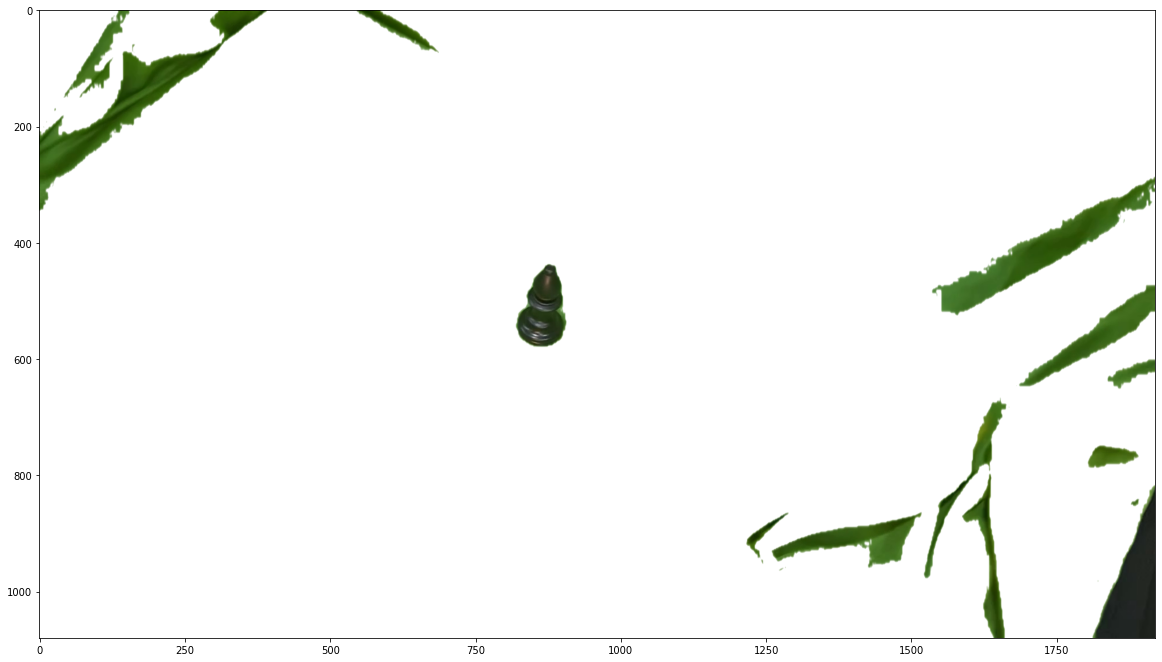

In [52]:
plt.imshow(img[:,:,::-1])
plt.show()


img2 = img.copy()
img2[:,:,0] = 0
fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(img2[:,:,::-1])
plt.show()

# convert to LAB
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

# extract A channel
A = lab[:,:,1]

# threshold A channel
thresh = cv2.threshold(A, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# blur threshold image
blur = cv2.GaussianBlur(thresh, (0,0), sigmaX=1, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# stretch so that 255 -> 255 and 127.5 -> 0
mask = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255)).astype(np.uint8)

# add mask to image as alpha channel
result = img.copy()
result = cv2.cvtColor(img,cv2.COLOR_BGR2BGRA)
result[:,:,3] = mask

fig, ax = plt.subplots(figsize=(20, 20))
plt.imshow(result)
plt.show()